In [1]:
#Observations
#Data was very clean from .gov website so didn't have to do very much data cleaning 
# It's noteworthy that the total death percentages between men and women was very similiar to the percentage totals for covid deaths among men and women.
# Although the total covid counts per men and women varied by the four selected states, TX and CA subsets had very similiar percentages of covid deaths between men and women and interestingly VA and NY also had very similiar percentages. 
#It would be interesting to research if that indicates more equality of care between the sexes as the reason for nearly equal death percentages in VA & NY or if there's some other reason for the results

In [2]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np



In [3]:
# invoke pandas csv function to import the csv file 
pd.read_csv("../resources/Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State (2).csv")

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,09/16/2020,02/01/2020,09/12/2020,United States,All Sexes,All Ages,182095.0,1957766.0,186116.0,81691.0,6687.0,292214.0,NaN
1,09/16/2020,02/01/2020,09/12/2020,United States,All Sexes,Under 1 year,20.0,10876.0,103.0,3.0,16.0,136.0,NaN
2,09/16/2020,02/01/2020,09/12/2020,United States,All Sexes,0-17 years,92.0,19295.0,313.0,17.0,123.0,511.0,NaN
3,09/16/2020,02/01/2020,09/12/2020,United States,All Sexes,1-4 years,14.0,2083.0,72.0,2.0,42.0,126.0,NaN
4,09/16/2020,02/01/2020,09/12/2020,United States,All Sexes,5-14 years,30.0,3226.0,102.0,8.0,52.0,176.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,09/16/2020,02/01/2020,09/12/2020,Puerto Rico,Unknown,65-74 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2656,09/16/2020,02/01/2020,09/12/2020,Puerto Rico,Unknown,75-84 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2657,09/16/2020,02/01/2020,09/12/2020,Puerto Rico,Unknown,85 years and over,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2658,09/16/2020,02/01/2020,09/12/2020,Puerto Rico,Unknown,All Ages,0.0,NaN,0.0,0.0,0.0,0.0,One or more data cells have counts between 1–9...


In [4]:
df = pd.read_csv("../resources/Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State (2).csv")
df.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,09/16/2020,02/01/2020,09/12/2020,United States,All Sexes,All Ages,182095.0,1957766.0,186116.0,81691.0,6687.0,292214.0,NaN
1,09/16/2020,02/01/2020,09/12/2020,United States,All Sexes,Under 1 year,20.0,10876.0,103.0,3.0,16.0,136.0,NaN
2,09/16/2020,02/01/2020,09/12/2020,United States,All Sexes,0-17 years,92.0,19295.0,313.0,17.0,123.0,511.0,NaN
3,09/16/2020,02/01/2020,09/12/2020,United States,All Sexes,1-4 years,14.0,2083.0,72.0,2.0,42.0,126.0,NaN
4,09/16/2020,02/01/2020,09/12/2020,United States,All Sexes,5-14 years,30.0,3226.0,102.0,8.0,52.0,176.0,NaN


In [5]:
# Calculate per state which sex died more often from covid
# View grouped states with grouped sex (m and f) sum of Covid deaths
# Problem is "sex" column has some roles unknown

In [6]:
df.describe()

,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
count,2246.000000,2.485000e+03,2174.000000,2262.000000,1887.000000,2168.000000
mean,618.719501,6.149024e+03,655.632015,276.547303,27.389507,1031.090406
std,5377.645142,5.423762e+04,5563.487619,2407.682613,213.355131,8746.661565
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.520000e+02,0.000000,0.000000,0.000000,13.000000
75%,89.750000,1.503000e+03,146.750000,37.000000,10.000000,212.000000
max,182095.000000,1.957766e+06,186116.000000,81691.000000,6687.000000,292214.000000


In [7]:
# Select sex column and view unique values
df["Sex"].unique()

array(['All Sexes', 'Male', 'Female', 'Unknown'], dtype=object)

In [8]:
covid_counts = df.groupby(["COVID-19 Deaths"])["Sex"]
covid_counts

In [9]:
df["Sex"].value_counts()

Male         864
Female       864
Unknown      863
All Sexes     69
Name: Sex, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

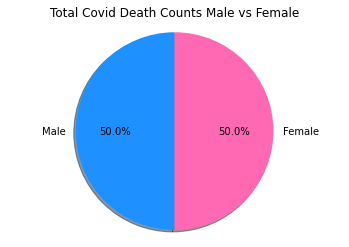

In [10]:
#create a pie chart use coloors "hotpink" and "dodgerblue"
Sex = ["Male", "Female"]
Deaths = ["864", "864"]
colors = ["dodgerblue", "hotpink"]

plt.title("Total Covid Death Counts Male vs Female")
plt.pie(Deaths, labels=Sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show

In [11]:
covid_counts

In [12]:
#Pick one state to compare summary of statistics of how covid deaths amongst male vs female changed by age
print(f"Compare how male vs female deaths in the state of Virginia were impacted by age groups.")

Compare how male vs female deaths in the state of Virginia were impacted by age groups.


In [13]:
#sort data to grab info on state selected
va_sex_data = df[(df["State"] == "Virginia")]
va_sex_data

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
2367,09/16/2020,02/01/2020,09/12/2020,Virginia,Male,Under 1 year,0.0,152.0,0.0,0.0,NaN,NaN,One or more data cells have counts between 1–9...
2368,09/16/2020,02/01/2020,09/12/2020,Virginia,Male,0-17 years,0.0,266.0,NaN,0.0,NaN,NaN,One or more data cells have counts between 1–9...
2369,09/16/2020,02/01/2020,09/12/2020,Virginia,Male,1-4 years,0.0,26.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1–9...
2370,09/16/2020,02/01/2020,09/12/2020,Virginia,Male,5-14 years,0.0,35.0,0.0,0.0,NaN,NaN,One or more data cells have counts between 1–9...
2371,09/16/2020,02/01/2020,09/12/2020,Virginia,Male,15-24 years,NaN,363.0,NaN,NaN,0.0,NaN,One or more data cells have counts between 1–9...
2372,09/16/2020,02/01/2020,09/12/2020,Virginia,Male,18-29 years,NaN,630.0,10.0,NaN,NaN,13.0,One or more data cells have counts between 1–9...
2373,09/16/2020,02/01/2020,09/12/2020,Virginia,Male,25-34 years,NaN,698.0,12.0,NaN,NaN,17.0,One or more data cells have counts between 1–9...
2374,09/16/2020,02/01/2020,09/12/2020,Virginia,Male,30-49 years,67.0,1951.0,61.0,30.0,NaN,104.0,One or more data cells have counts between 1–9...
2375,09/16/2020,02/01/2020,09/12/2020,Virginia,Male,35-44 years,25.0,942.0,26.0,10.0,NaN,46.0,One or more data cells have counts between 1–9...
2376,09/16/2020,02/01/2020,09/12/2020,Virginia,Male,45-54 years,81.0,1654.0,76.0,35.0,NaN,126.0,One or more data cells have counts between 1–9...


In [14]:
va_sex_data.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
2367,09/16/2020,02/01/2020,09/12/2020,Virginia,Male,Under 1 year,0.0,152.0,0.0,0.0,NaN,NaN,One or more data cells have counts between 1–9...
2368,09/16/2020,02/01/2020,09/12/2020,Virginia,Male,0-17 years,0.0,266.0,NaN,0.0,NaN,NaN,One or more data cells have counts between 1–9...
2369,09/16/2020,02/01/2020,09/12/2020,Virginia,Male,1-4 years,0.0,26.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1–9...
2370,09/16/2020,02/01/2020,09/12/2020,Virginia,Male,5-14 years,0.0,35.0,0.0,0.0,NaN,NaN,One or more data cells have counts between 1–9...
2371,09/16/2020,02/01/2020,09/12/2020,Virginia,Male,15-24 years,NaN,363.0,NaN,NaN,0.0,NaN,One or more data cells have counts between 1–9...


In [15]:
#having trouble with this data set, needs to be cleaned, additionally looking for additional data within data set or same website to answer some of my questions and meet requirements 
#will import cleaned csv file cleaned by @Nic and @Aaron from last nights project work and see if it helps

In [16]:
pd.read_csv("../resources/clean_main.csv")

,Unnamed: 0,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths
0,0,United States,All Sexes,All Ages,182095.0,1957766.0,186116.0,81691.0,6687.0
1,1,United States,All Sexes,Under 1 year,20.0,10876.0,103.0,3.0,16.0
2,2,United States,All Sexes,0-17 years,92.0,19295.0,313.0,17.0,123.0
3,3,United States,All Sexes,1-4 years,14.0,2083.0,72.0,2.0,42.0
4,4,United States,All Sexes,5-14 years,30.0,3226.0,102.0,8.0,52.0
...,...,...,...,...,...,...,...,...,...
1377,2654,Puerto Rico,Unknown,55-64 years,0.0,0.0,0.0,0.0,0.0
1378,2655,Puerto Rico,Unknown,65-74 years,0.0,0.0,0.0,0.0,0.0
1379,2656,Puerto Rico,Unknown,75-84 years,0.0,0.0,0.0,0.0,0.0
1380,2657,Puerto Rico,Unknown,85 years and over,0.0,0.0,0.0,0.0,0.0


In [17]:
df = pd.read_csv("../resources/clean_main.csv")
df

,Unnamed: 0,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths
0,0,United States,All Sexes,All Ages,182095.0,1957766.0,186116.0,81691.0,6687.0
1,1,United States,All Sexes,Under 1 year,20.0,10876.0,103.0,3.0,16.0
2,2,United States,All Sexes,0-17 years,92.0,19295.0,313.0,17.0,123.0
3,3,United States,All Sexes,1-4 years,14.0,2083.0,72.0,2.0,42.0
4,4,United States,All Sexes,5-14 years,30.0,3226.0,102.0,8.0,52.0
...,...,...,...,...,...,...,...,...,...
1377,2654,Puerto Rico,Unknown,55-64 years,0.0,0.0,0.0,0.0,0.0
1378,2655,Puerto Rico,Unknown,65-74 years,0.0,0.0,0.0,0.0,0.0
1379,2656,Puerto Rico,Unknown,75-84 years,0.0,0.0,0.0,0.0,0.0
1380,2657,Puerto Rico,Unknown,85 years and over,0.0,0.0,0.0,0.0,0.0


In [18]:
#clean up "cleaned" file to fit my needs
clean_men_vs_women = df.loc[df["Age group"] == "All Ages"].index
clean_men_vs_women

Int64Index([   0,   31,   47,   63,   68,   72,   88,   89,  111,  117,
            ...
            1298, 1309, 1316, 1323, 1339, 1340, 1361, 1364, 1368, 1381],
           dtype='int64', length=180)

In [19]:
#clean up "cleaned" file to fit my needs to find overall male vs female u.s. covid deaths
clean_men_vs_women = df[df["Age group"] == "All Ages"]
clean_men_vs_women

,Unnamed: 0,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths
0,0,United States,All Sexes,All Ages,182095.0,1957766.0,186116.0,81691.0,6687.0
31,31,United States,Male,All Ages,98383.0,1021269.0,101845.0,46014.0,3445.0
47,47,United States,Female,All Ages,83708.0,936425.0,84266.0,35673.0,3241.0
63,63,United States,Unknown,All Ages,4.0,72.0,5.0,4.0,1.0
68,79,Alabama,Male,All Ages,1501.0,18665.0,1468.0,501.0,60.0
...,...,...,...,...,...,...,...,...,...
1340,2562,Wisconsin,All Sexes,All Ages,1158.0,34844.0,1733.0,227.0,150.0
1361,2610,Wyoming,Unknown,All Ages,0.0,0.0,0.0,0.0,0.0
1364,2627,Puerto Rico,Male,All Ages,264.0,8747.0,1099.0,162.0,24.0
1368,2643,Puerto Rico,Female,All Ages,172.0,7628.0,961.0,96.0,43.0


<function matplotlib.pyplot.show(*args, **kw)>

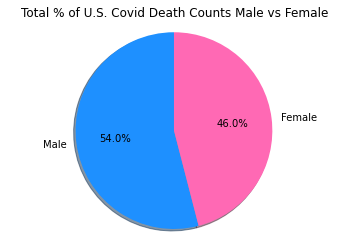

In [20]:
#create a pie chart use colors "hotpink" and "dodgerblue"
Sex = ["Male", "Female"]
Deaths = ["98383", "83708"]
colors = ["dodgerblue", "hotpink"]

plt.title("Total % of U.S. Covid Death Counts Male vs Female")
plt.pie(Deaths, labels=Sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show

In [21]:
clean_men_vs_women.head()

,Unnamed: 0,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths
0,0,United States,All Sexes,All Ages,182095.0,1957766.0,186116.0,81691.0,6687.0
31,31,United States,Male,All Ages,98383.0,1021269.0,101845.0,46014.0,3445.0
47,47,United States,Female,All Ages,83708.0,936425.0,84266.0,35673.0,3241.0
63,63,United States,Unknown,All Ages,4.0,72.0,5.0,4.0,1.0
68,79,Alabama,Male,All Ages,1501.0,18665.0,1468.0,501.0,60.0


<function matplotlib.pyplot.show(*args, **kw)>

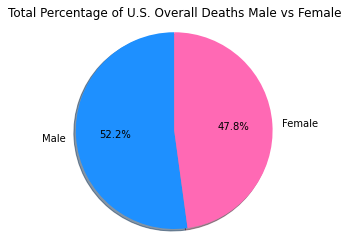

In [22]:
#create a pie chart to visualize how percentage of total deaths compares male vs female to % m/f covid deaths
Sex = ["Male", "Female"]
Deaths = ["1021269","936425"]
colors = ["dodgerblue", "hotpink"]

plt.title("Total Percentage of U.S. Overall Deaths Male vs Female")
plt.pie(Deaths, labels=Sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show

In [23]:
#male vs female by state prep work for bar plot
clean_men_vs_women_VA = df[df["State"] == "Virginia"]
clean_men_vs_women_VA 

# clean_men_vs_women_TX = df[df["State"] == "Texas"]
# clean_men_vs_women_TX

# clean_men_vs_women_NY = df[df["State"] == "New York"]
# clean_men_vs_women_NY

# clean_men_vs_women_CA = df[df["State"] == "Calfifornia"]
# clean_men_vs_women_CA

,Unnamed: 0,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths
1250,2377,Virginia,Male,50-64 years,253.0,4739.0,287.0,120.0,12.0
1251,2379,Virginia,Male,65-74 years,339.0,5189.0,364.0,150.0,19.0
1252,2380,Virginia,Male,75-84 years,412.0,5938.0,467.0,160.0,10.0
1253,2381,Virginia,Male,85 years and over,361.0,5171.0,375.0,111.0,12.0
1254,2382,Virginia,Male,All Ages,1437.0,23884.0,1565.0,574.0,62.0
1255,2393,Virginia,Female,50-64 years,136.0,3057.0,202.0,61.0,13.0
1256,2394,Virginia,Female,55-64 years,107.0,2438.0,163.0,48.0,12.0
1257,2396,Virginia,Female,75-84 years,359.0,5705.0,338.0,115.0,12.0
1258,2397,Virginia,Female,85 years and over,623.0,8468.0,474.0,143.0,15.0
1259,2398,Virginia,Female,All Ages,1405.0,22651.0,1337.0,439.0,52.0


In [24]:
#male vs female by state prep work for bar plot
final_men_vs_women_VA = clean_men_vs_women_VA[clean_men_vs_women_VA["Age group"] == "All Ages"]
final_men_vs_women_VA

,Unnamed: 0,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths
1254,2382,Virginia,Male,All Ages,1437.0,23884.0,1565.0,574.0,62.0
1259,2398,Virginia,Female,All Ages,1405.0,22651.0,1337.0,439.0,52.0
1270,2415,Virginia,All Sexes,All Ages,2843.0,46538.0,2903.0,1014.0,114.0


<function matplotlib.pyplot.show(*args, **kw)>

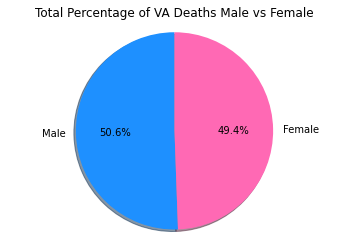

In [25]:
Sex = ["Male", "Female"]
Deaths = ["1437","1405"]
colors = ["dodgerblue", "hotpink"]

plt.title("Total Percentage of VA Deaths Male vs Female")
plt.pie(Deaths, labels=Sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show

In [26]:
clean_men_vs_women_TX = df[df["State"] == "Texas"]
clean_men_vs_women_TX

,Unnamed: 0,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths
1173,2224,Texas,Male,15-24 years,22.0,1467.0,41.0,10.0,0.0
1174,2227,Texas,Male,30-49 years,683.0,7048.0,536.0,311.0,16.0
1175,2229,Texas,Male,45-54 years,756.0,6052.0,597.0,353.0,18.0
1176,2230,Texas,Male,50-64 years,1922.0,16257.0,1811.0,945.0,49.0
1177,2231,Texas,Male,55-64 years,1477.0,12718.0,1439.0,732.0,38.0
1178,2232,Texas,Male,65-74 years,2109.0,17368.0,2231.0,1127.0,33.0
1179,2233,Texas,Male,75-84 years,1999.0,17989.0,2249.0,1037.0,43.0
1180,2234,Texas,Male,85 years and over,1327.0,14355.0,1607.0,661.0,26.0
1181,2235,Texas,Male,All Ages,8118.0,76566.0,8545.0,4114.0,173.0
1182,2243,Texas,Female,30-49 years,322.0,3736.0,330.0,155.0,24.0


In [27]:
final_men_vs_women_TX = clean_men_vs_women_TX[clean_men_vs_women_TX["Age group"] == "All Ages"]
final_men_vs_women_TX

,Unnamed: 0,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths
1181,2235,Texas,Male,All Ages,8118.0,76566.0,8545.0,4114.0,173.0
1190,2251,Texas,Female,All Ages,5726.0,65871.0,6581.0,2846.0,188.0
1201,2268,Texas,All Sexes,All Ages,13844.0,142440.0,15126.0,6960.0,361.0


<function matplotlib.pyplot.show(*args, **kw)>

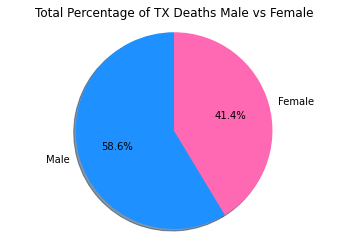

In [28]:
Sex = ["Male", "Female"]
Deaths = ["8118","5726"]
colors = ["dodgerblue", "hotpink"]

plt.title("Total Percentage of TX Deaths Male vs Female")
plt.pie(Deaths, labels=Sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show

In [29]:

clean_men_vs_women_NY = df[df["State"] == "New York"]
clean_men_vs_women_NY

,Unnamed: 0,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths
865,1642,New York,Male,50-64 years,1150.0,6792.0,920.0,581.0,21.0
866,1643,New York,Male,55-64 years,917.0,5326.0,736.0,458.0,18.0
867,1644,New York,Male,65-74 years,1474.0,8004.0,1267.0,734.0,26.0
868,1645,New York,Male,75-84 years,1617.0,9292.0,1510.0,821.0,26.0
869,1646,New York,Male,85 years and over,1534.0,10281.0,1667.0,757.0,29.0
870,1647,New York,Male,All Ages,6108.0,37957.0,5594.0,3047.0,111.0
871,1654,New York,Female,25-34 years,19.0,362.0,16.0,10.0,0.0
872,1658,New York,Female,50-64 years,527.0,4076.0,506.0,275.0,15.0
873,1659,New York,Female,55-64 years,442.0,3349.0,428.0,234.0,13.0
874,1660,New York,Female,65-74 years,833.0,5824.0,781.0,421.0,13.0


In [30]:
final_men_vs_women_NY = clean_men_vs_women_NY[clean_men_vs_women_NY["Age group"] == "All Ages"]
final_men_vs_women_NY

,Unnamed: 0,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths
870,1647,New York,Male,All Ages,6108.0,37957.0,5594.0,3047.0,111.0
877,1663,New York,Female,All Ages,5461.0,37408.0,4856.0,2530.0,100.0
891,1680,New York,All Sexes,All Ages,11569.0,75368.0,10450.0,5577.0,211.0


<function matplotlib.pyplot.show(*args, **kw)>

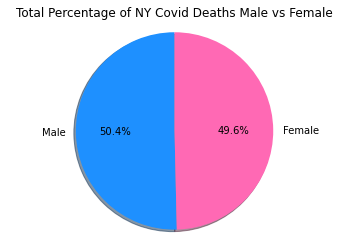

In [31]:
Sex = ["Male", "Female"]
Deaths = ["37957","37408"]
colors = ["dodgerblue", "hotpink"]

plt.title("Total Percentage of NY Covid Deaths Male vs Female")
plt.pie(Deaths, labels=Sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show

In [32]:
clean_men_vs_women_CA = df[df["State"] == "California"]
clean_men_vs_women_CA

,Unnamed: 0,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths
166,267,California,Male,30-49 years,638.0,8485.0,658.0,366.0,24.0
167,268,California,Male,35-44 years,285.0,4074.0,298.0,160.0,10.0
168,269,California,Male,45-54 years,696.0,6879.0,709.0,389.0,33.0
169,270,California,Male,50-64 years,1847.0,19014.0,2065.0,1070.0,94.0
170,271,California,Male,55-64 years,1444.0,14873.0,1650.0,852.0,71.0
171,272,California,Male,65-74 years,1951.0,20500.0,2508.0,1154.0,64.0
172,273,California,Male,75-84 years,1849.0,22377.0,2756.0,1106.0,58.0
173,274,California,Male,85 years and over,1641.0,23980.0,2611.0,884.0,52.0
174,275,California,Male,All Ages,7979.0,98365.0,10692.0,4599.0,306.0
175,282,California,Female,25-34 years,44.0,1132.0,67.0,23.0,10.0


In [33]:
final_men_vs_women_CA = clean_men_vs_women_CA[clean_men_vs_women_CA["Age group"] == "All Ages"]
final_men_vs_women_CA

,Unnamed: 0,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths
174,275,California,Male,All Ages,7979.0,98365.0,10692.0,4599.0,306.0
184,291,California,Female,All Ages,5762.0,85900.0,8194.0,3104.0,274.0
196,308,California,All Sexes,All Ages,13741.0,184267.0,18886.0,7703.0,580.0


<function matplotlib.pyplot.show(*args, **kw)>

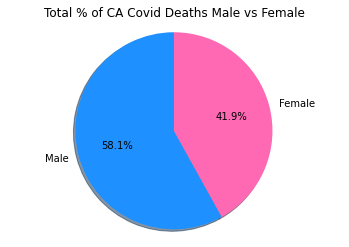

In [34]:
Sex = ["Male", "Female"]
Deaths = ["7979","5762"]
colors = ["dodgerblue", "hotpink"]

plt.title("Total % of CA Covid Deaths Male vs Female")
plt.pie(Deaths, labels=Sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show

In [35]:
plotdata = pd.DataFrame
plotdata

pandas.core.frame.DataFrame

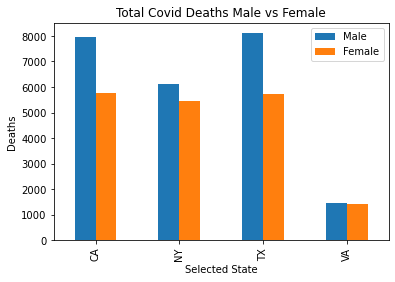

In [36]:
plotdata = pd.DataFrame({
    "Male": [7979, 6108, 8118, 1437],
    "Female": [5762,5461,5726,1405]
     
    },
    index=["CA", "NY", "TX", "VA"]
  
)

plotdata.plot(kind="bar")

plt.title("Total Covid Deaths Male vs Female")
plt.xlabel("Selected State")
plt.ylabel("Deaths")

plt.show()